In [ ]:
!nvidia-smi

# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [2]:
!pip3 install openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 5.5 MB/s eta 0:00:00


### Step 2. Install MMDetection from the source.

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

### Step 3. Verification

In [4]:
import mmdet
print(mmdet.__version__)
# Example output: 2.26.0

2.27.0


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [5]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 42.1 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [ ]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

# Train A Detector on A Customized Dataset
- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

### Oxford Pet Dataset 다운로드
* [The Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) 
* Image당 Object가 1개가 있어서 Classification 문제로도 사용됨
* 37개 품종 분류 (품종당 200장 정도 데이터) : Dataset Statistics 확인

In [7]:
# download the data
# files: images.tar.gz (dataset) and annotations.tar.gz (groundtruth data).
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

--2023-01-04 02:51:44--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  11.3MB/s    in 69s     

2023-01-04 02:52:54 (11.0 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2023-01-04 02:52:54--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/octet-stream]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  5.68MB/s    in 3.2s    

2023-01-04 

In [ ]:
# decompress the data
!mkdir ./oxford_pet
!tar -xvf images.tar.gz -C ./oxford_pet
!tar -xvf annotations.tar.gz -C ./oxford_pet

### Oxford Pet Dataset의 디렉토리 구조 보기

In [ ]:
# Check the directory structure of the Oxford Pet

# Install tree first
!apt-get -q install tree

In [ ]:
!tree ./oxford_pet/annotations/xmls

In [ ]:
!tree ./oxford_pet/images

### 이미지와 레이블 보기

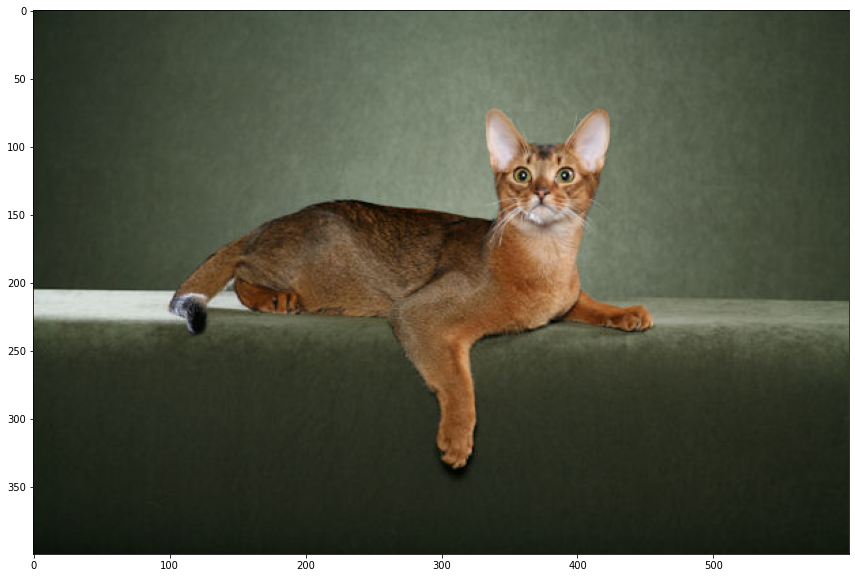

In [12]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('./oxford_pet/images/Abyssinian_1.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [13]:
# Check the label of a single image
!cat ./oxford_pet/annotations/xmls/Abyssinian_1.xml

<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>


In [15]:
img_path = "Abyssinian_1.jpg"
class_name = img_path[:img_path.rfind('_')]
class_name

'Abyssinian'

[{'class_name': 'Abyssinian', 'bndbox_coor': (333, 72, 425, 158)}]


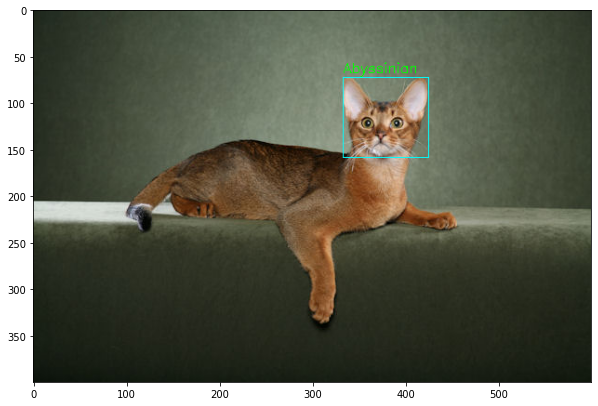

In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
img_dir = "./oxford_pet/images/"
xml_file = "./oxford_pet/annotations/xmls/Abyssinian_1.xml"

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('object')
object_list = []

for obj in objects:
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = img_path[:img_path.rfind('_')]

  cv2.rectangle(dst, (x1, y1), (x2, y2), color=(255, 255, 0), thickness=1)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1 )

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

Annotation 파일 관련

In [17]:
import pandas as pd
pet_df = pd.read_csv('./oxford_pet/annotations/trainval.txt', sep=' ', header=None,
                     names=["image_name", "class_id", "dummy1", "dummy2" ])
pet_df

,image_name,class_id,dummy1,dummy2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
3675,yorkshire_terrier_187,37,2,25
3676,yorkshire_terrier_188,37,2,25
3677,yorkshire_terrier_189,37,2,25
3678,yorkshire_terrier_18,37,2,25


In [ ]:
pet_df['class_id'].value_counts()

In [19]:
pet_df['class_name'] = pet_df['image_name'].apply(lambda x:x[:x.rfind('_')])
pet_df.head()

,image_name,class_id,dummy1,dummy2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian


In [20]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(pet_df, test_size=0.1, stratify=pet_df['class_id'], random_state=42)

In [ ]:
print(train_df['class_id'].value_counts(), val_df['class_id'].value_counts())

In [22]:
train_df = train_df.sort_values(by='image_name')
val_df = val_df.sort_values(by='image_name')

In [23]:
# ann_file로 주어지는 메타파일은 가급적이면 소스데이터의 가장 상단 디렉토리에 저장하는 것이 바람직. 
train_df['image_name'].to_csv('./oxford_pet/train.txt', sep=' ', header=False, index=False)
val_df['image_name'].to_csv('./oxford_pet/val.txt', sep=' ', header=False, index=False)

In [24]:
pet_classes_list = pet_df['class_name'].unique().tolist()
print(pet_classes_list)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


### Oxford Pet Dataset을 Middle Format으로 변환하기

```
[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4) in (x1, y1, x2, y2) order,
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

- github의 mmdet/datasets 디렉토리 아래 [custom.py](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/datasets/custom.py)에 CustomDataset 클래스 정의
- 새로 정의한 데이터셋이 CustomDataset을 상속받으므로 부모 클래스의 __init__()함수 적용
- 이 클래스 객체를 생성하는 것은 MMDetection Framework 내부에서 하며 이 때 Config에서 설정한 Dataset 관련 내용(이미지, 라벨 등이 위치한 디렉토리)들이 __init__()을 통해 설정되어 있음

In [ ]:
def get_bboxes(anno_xml_path, filename):
  tree = ET.parse(anno_xml_path)
  root = tree.getroot()

  objects = root.findall('object')
  object_list = []

  bbox_names = []
  bboxes = []

  for obj in objects:

    bbox_name = filename[:filename.rfind('_')]

    box = obj.find("bndbox")
    x1 = int(box.find('xmin').text)
    y1 = int(box.find('ymin').text)
    x2 = int(box.find('xmax').text)
    y2 = int(box.find('ymax').text)

    bbox_names.append(bbox_name)
    bboxes.append([x1, y1, x2, y2])
  return bbox_names, bboxes

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module(force=True) # 데코레이터를 통해 CustomDataset(OxfordPetDataset)을 MMDetection FWK에 등록, 재등록 실패시 (force=True)
class OxfordPetDataset(CustomDataset):

    pet_classes = pet_df["class_name"].unique().tolist()
    CLASSES = pet_classes
    # 생성자 함수 생성(디버깅용)
    # def __init__(self, data_root, ann_file, img_prefix):
    #     self.data_root = data_root
    #     self.ann_file = osp.join(data_root, ann_file)
    #     self.img_prefix = osp.join(data_root, img_prefix)
      
    #     self.data_infos = self.load_annotations(self.ann_file)    

    def load_annotations(self, ann_file):
        # self.ann_file : ./oxford_pet/train.txt
        # self.img_prefix : ./oxford_pet/images/

        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('images', 'annotations')
            anno_xml_path = osp.join(label_prefix, 'xmls/' + str(image_id) + '.xml')
    
            if not os.path.exists(anno_xml_path):
              continue
 
            bbox_names, bboxes = get_bboxes(anno_xml_path, str(image_id) + '.xml')
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [ ]:
# dataset 잘 만들었는지 확인용
# train_ds = OxfordPetDataset(data_root='./data', ann_file='train.txt', img_prefix='images')
# print(train_ds.data_infos[:10])

### Config 파일 수정하기
- 아래 주어진 config 파일은 COCO dataset 기준으로 Faster R-CNN 을 훈련 시키는 설정이므로 Oxford Pet Dataset 에 맞게 수정해야 함

In [ ]:
from mmcv import Config
cfg = Config.fromfile('./configs/yolo/yolov3_d53_mstrain-416_273e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

### Pretrained 모델 다운로드하기

In [ ]:
%pwd

In [ ]:
# !mkdir checkpoints
# !cp '/content/drive/MyDrive/Classroom/Object Detection/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth' \
# ./checkpoints/

In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-416_273e_coco/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth \
      -O checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth

In [ ]:
# 학습 수행후 모델 checkpoint 저장할 공간 연결
# !mkdir /content/drive/MyDrive/pet_log

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'OxfordPetDataset'
cfg.data_root = 'oxford_pet/'

cfg.data.test.type = 'OxfordPetDataset'
cfg.data.test.data_root = 'oxford_pet/'
cfg.data.test.ann_file = 'test.txt'
cfg.data.test.img_prefix = 'images'

cfg.data.train.type = 'OxfordPetDataset'
cfg.data.train.data_root = 'oxford_pet/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'OxfordPetDataset'
cfg.data.val.data_root = 'oxford_pet/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 37
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth'

# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive/pet_log'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.001/8
cfg.log_config.interval = 10

# max epochs 243 -> 20
cfg.runner.max_epochs = 20

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 8 -> 2
cfg.data.samples_per_gpu = 2
cfg.data.workers_per_gpu = 2


cfg.auto_scale_lr.base_batch_size=2

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 20 #12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20 #12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

### Config에서 설정한 OxfordPet Dataset 적용
- build_dataset() 가 호출될 때 MMDetection Framework에서 OxfordPetDataset 클래스 객체를 생성
- load_annotations() 함수가 호출될 때 self.ann_file, self.data_root, self.img_prefix 값이 Config에서 설정한 파일들로 적용되어 있음

In [ ]:
from mmdet.datasets import build_dataset

# Build dataset
datasets = [build_dataset(cfg.data.train)]

In [ ]:
datasets

### Config에서 설정한 모델 적용

In [ ]:
from mmdet.models import build_detector

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

### 학습 수행

In [ ]:
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True) # validate=True : validation 데이터로 evaluation

### 로그 확인하기

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir /content/drive/MyDrive/pet_log

### 학습된 모델로 예측하기

In [ ]:
# from mmdet.apis import show_result_pyplot

In [ ]:
# img = mmcv.imread('kitti_tiny/training/image_2/000068.jpeg')

# model.cfg = cfg
# result = inference_detector(model, img)
# show_result_pyplot(model, img, result)

In [ ]:
from mmdet.apis import show_result_pyplot

checkpoint_file = '/content/drive/MyDrive/pet_log/epoch_20.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
img = mmcv.imread('./oxford_pet/images/Abyssinian_88.jpg') # BGR Image 사용 
#model_ckpt.cfg = cfg

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.3)

In [ ]:
val_df

In [ ]:
Abysn_df = val_df[val_df['class_name'] == 'Abyssinian']
Abysn_img_paths = './oxford_pet/images/' + Abysn_df['image_name'] + '.jpg'
Abysn_img_paths.values

In [ ]:
Abysn_imgs = [mmcv.imread(x) for x in Abysn_img_paths.values]

In [ ]:
PET_CLASSES = pet_df['class_name'].unique().tolist()
labels_to_names = {i:k for i, k in enumerate(PET_CLASSES)}

In [ ]:
for i in range(len(Abysn_imgs)):
  results = inference_detector(model_ckpt, Abysn_imgs[i])
  for result_ind, result in enumerate(results):
    if result.size == 0:
      continue
    print(labels_to_names[result_ind], result[0][4])
  show_result_pyplot(model_ckpt, Abysn_imgs[i], results, score_thr=0.6)